#CLUSTERING
1. k-means clustering
2. heirarchical clustering
3. grid-based clustering


#K-MEANS CLUSTERING

In [9]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [20]:
from sklearn.datasets import load_wine
wine = load_wine()
df = pd.DataFrame(data=np.c_[wine['data'], wine['target']],
                  columns=wine['feature_names'] + ['target'])

In [22]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(df.drop('target', axis=1))

In [10]:
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(x_scaled)
  wcss.append(kmeans.inertia_)

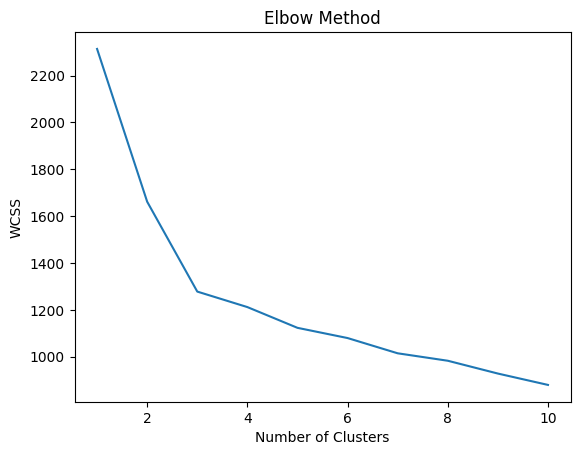

In [12]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [13]:
silhouette_scores = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(x_scaled)
  score = silhouette_score(x_scaled, kmeans.labels_)
  silhouette_scores.append(score)

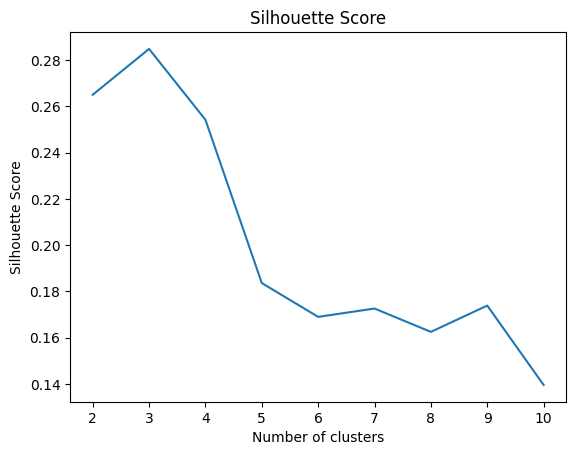

In [14]:
plt.plot(range(2,11), silhouette_scores)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [15]:
kmeans = KMeans(n_clusters=3, init = 'k-means++', random_state=42)
kmeans.fit(x_scaled)

KMeans(n_clusters=3, random_state=42)

In [34]:
df['Cluster'] = kmeans.labels_
print(df.groupby('Cluster').mean())

           alcohol  malic_acid       ash  alcalinity_of_ash   magnesium  \
Cluster                                                                   
0        12.250923    1.897385  2.231231          20.063077   92.738462   
1        13.134118    3.307255  2.417647          21.241176   98.666667   
2        13.676774    1.997903  2.466290          17.462903  107.967742   

         total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
Cluster                                                                     
0             2.247692    2.050000              0.357692         1.624154   
1             1.683922    0.818824              0.451961         1.145882   
2             2.847581    3.003226              0.292097         1.922097   

         color_intensity       hue  od280/od315_of_diluted_wines      proline  \
Cluster                                                                         
0               2.973077  1.062708                      2.803385   510.16923

#HEIRACHICAL CLUSTERING

In [42]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

In [36]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(df.drop('target', axis=1))

In [53]:
shc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
shc.fit(x_scaled)

TypeError: AgglomerativeClustering.__init__() got an unexpected keyword argument 'affinity'

AttributeError: 'AgglomerativeClustering' object has no attribute 'dendrogram'

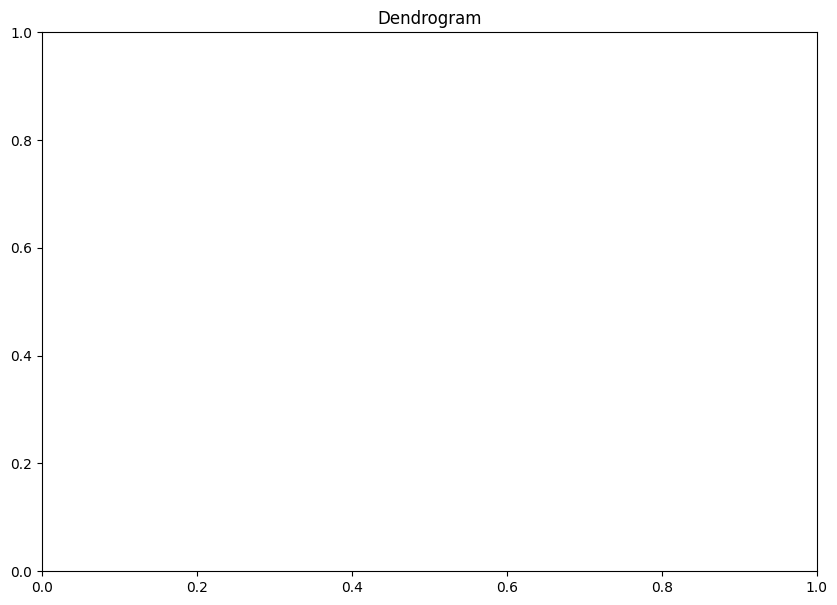

In [54]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dend = shc.dendrogram(shc.linkage(x_scaled, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')
plt.show()

In [35]:
df['Cluster'] = shc.labels_
print(df.groupby('Cluster').mean())

AttributeError: module 'scipy.cluster.hierarchy' has no attribute 'labels_'

#GRID CLUSTERING

In [55]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import silhouette_score

wine = load_wine()
data = pd.DataFrame(data=np.c_[wine['data'], wine['target']],
                     columns=wine['feature_names'] + ['target'])

discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
X_discretized = discretizer.fit_transform(data.drop('target', axis=1))

kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(X_discretized)

silhouette_avg = silhouette_score(X_discretized, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

data['Cluster'] = kmeans.labels_
print(data.groupby('Cluster').mean())

Silhouette Score: 0.29238913250928067
           alcohol  malic_acid       ash  alcalinity_of_ash   magnesium  \
Cluster                                                                   
0        12.245556    1.935397  2.258413          20.301587   93.650794   
1        13.080893    3.181250  2.406964          21.060714   98.321429   
2        13.730678    1.962542  2.443559          17.147458  107.593220   

         total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
Cluster                                                                     
0             2.307778    2.174921              0.348571         1.678730   
1             1.697143    0.863929              0.457143         1.137500   
2             2.849153    2.979831              0.285593         1.927458   

         color_intensity       hue  od280/od315_of_diluted_wines      proline  \
Cluster                                                                         
0               3.048413  1.063968    